# Yahoo Finance Web Scraper

This notebook demonstrates how to use the yfinance python libary to access all stock related information from https://finance.yahoo.com/. 

### Install Libaries

In [ ]:
!pip install yahoo-finance --quiet
!pip install yfinance --quiet

### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime
import time
import random
from IPython.core.display import HTML, display

import yfinance as yf

### Configure Jupyter Enviornment

In [2]:
%matplotlib inline

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 255)

display(HTML("<style>.container {width:85%} </style>"))

### Retrieve Data

In [30]:
nasdaq_df = pd.read_csv('/Users/etran/data-product/Projects/Web-Scrapers/yfinance-web-scraper/data/nasdaq_screener_05-09-2021.csv')
nasdaq_df

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$133.90,1.500,1.13%,4.079900e+10,United States,1999.0,1044215,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$41.20,1.310,3.28%,7.693059e+09,NaN,2016.0,4823752,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary Shares,$9.83,0.015,0.15%,1.228248e+09,NaN,2021.0,95765,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$2.91,0.050,1.75%,9.225046e+07,China,NaN,29521,Miscellaneous,Service to the Health Industry
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$9.91,-0.010,-0.10%,8.974744e+08,United States,2020.0,836193,Finance,Business Services
...,...,...,...,...,...,...,...,...,...,...,...
7705,ZWRKW,Z-Work Acquisition Corp. Warrant,$0.69,-0.015,-2.14%,0.000000e+00,United States,2021.0,86860,Finance,Business Services
7706,ZY,Zymergen Inc. Common Stock,$42.77,1.530,3.71%,4.188932e+09,United States,2021.0,144513,Basic Industries,Industrial Specialties
7707,ZYME,Zymeworks Inc. Common Shares,$30.30,0.810,2.75%,1.398771e+09,Canada,2017.0,396360,NaN,NaN
7708,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$4.49,0.480,11.97%,1.852194e+08,United States,2015.0,2578443,Health Care,Major Pharmaceuticals


In [33]:
companies = nasdaq_df[~nasdaq_df['Name'].str.contains("ETF") & (nasdaq_df['Market Cap'] > 0) & (nasdaq_df['IPO Year'] > 0) & 
                              (nasdaq_df['Country'].notnull())].sort_values('Market Cap', ascending=False)
companies

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
17,AAPL,Apple Inc. Common Stock,$130.21,0.6900,0.53%,2.257500e+12,United States,1980.0,78891430,Technology,Computer Manufacturing
4669,MSFT,Microsoft Corporation Common Stock,$252.46,2.7300,1.09%,1.901420e+12,United States,1986.0,27009992,Technology,Computer Software: Prepackaged Software
432,AMZN,Amazon.com Inc. Common Stock,"$3,291.61",-14.7600,-0.45%,1.660040e+12,United States,1997.0,4706680,Consumer Services,Catalog/Specialty Distribution
3123,GOOG,Alphabet Inc. Class C Capital Stock,"$2,398.69",17.3400,0.73%,1.607520e+12,United States,2004.0,1163566,Technology,Internet and Information Services
2527,FB,Facebook Inc. Class A Common Stock,$319.08,-0.9400,-0.29%,9.047400e+11,United States,2012.0,15912769,Technology,Internet and Information Services
...,...,...,...,...,...,...,...,...,...,...,...
1803,CTIB,Yunhong CTI Ltd. Common Stock,$1.67,-0.0500,-2.91%,9.830873e+06,United States,1997.0,99176,Miscellaneous,Diversified Commercial Services
486,APOP,Cellect Biotechnology Ltd. American Depositary Shares,$2.50,0.0700,2.88%,9.773725e+06,Israel,2016.0,116559,Health Care,Medical/Dental Instruments
3757,ISIG,Insignia Systems Inc. Common Stock,$5.37,0.1300,2.48%,9.419141e+06,United States,1991.0,29690,Technology,Advertising
3932,KBSF,KBS Fashion Group Limited Common Stock,$3.23,0.0200,0.62%,8.369896e+06,China,2013.0,268404,Consumer Non-Durables,Apparel


In [34]:
companies.shape

(2967, 11)

In [4]:
us_companies = nasdaq_df[~nasdaq_df['Name'].str.contains("ETF") & (nasdaq_df['Market Cap'] > 0) & (nasdaq_df['IPO Year'] > 0) & (nasdaq_df['Country'] == 'United States')].sort_values('Market Cap', ascending=False)
us_companies

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
17,AAPL,Apple Inc. Common Stock,$130.21,0.69,0.53%,2.257500e+12,United States,1980.0,78891430,Technology,Computer Manufacturing
4669,MSFT,Microsoft Corporation Common Stock,$252.46,2.73,1.09%,1.901420e+12,United States,1986.0,27009992,Technology,Computer Software: Prepackaged Software
432,AMZN,Amazon.com Inc. Common Stock,"$3,291.61",-14.76,-0.45%,1.660040e+12,United States,1997.0,4706680,Consumer Services,Catalog/Specialty Distribution
3123,GOOG,Alphabet Inc. Class C Capital Stock,"$2,398.69",17.34,0.73%,1.607520e+12,United States,2004.0,1163566,Technology,Internet and Information Services
2527,FB,Facebook Inc. Class A Common Stock,$319.08,-0.94,-0.29%,9.047400e+11,United States,2012.0,15912769,Technology,Internet and Information Services
...,...,...,...,...,...,...,...,...,...,...,...
3160,GRIL,Muscle Maker Inc Common Stock,$1.54,0.11,7.69%,1.658269e+07,United States,2020.0,1596621,NaN,NaN
7505,WORX,SCWorx Corp. Common Stock,$1.41,-0.02,-1.40%,1.414150e+07,United States,2016.0,125526,Health Care,Managed Health Care
5040,NURO,NeuroMetrix Inc. Common Stock,$2.92,0.06,2.10%,1.110533e+07,United States,2004.0,55145,Health Care,Medical/Dental Instruments
1803,CTIB,Yunhong CTI Ltd. Common Stock,$1.67,-0.05,-2.91%,9.830873e+06,United States,1997.0,99176,Miscellaneous,Diversified Commercial Services


In [5]:
us_tickers = list(us_companies['Symbol'])
us_tickers

['AAPL',
 'MSFT',
 'AMZN',
 'GOOG',
 'FB',
 'TSLA',
 'MA',
 'NVDA',
 'ADBE',
 'ORCL',
 'CSCO',
 'NFLX',
 'ABBV',
 'CRM',
 'UPS',
 'AVGO',
 'QCOM',
 'AMGN',
 'SBUX',
 'BLK',
 'GS',
 'SE',
 'AMAT',
 'EL',
 'INTU',
 'SQ',
 'ISRG',
 'NOW',
 'ABNB',
 'LRCX',
 'ZM',
 'GM',
 'GILD',
 'SNAP',
 'ZTS',
 'FISV',
 'CME',
 'COF',
 'HCA',
 'VMW',
 'MRNA',
 'ICE',
 'BX',
 'EQIX',
 'SNOW',
 'MET',
 'ILMN',
 'VRTX',
 'REGN',
 'DG',
 'TWLO',
 'KLAC',
 'ROST',
 'ALGN',
 'ROP',
 'IDXX',
 'IQV',
 'LVS',
 'TROW',
 'CVNA',
 'DLR',
 'CRWD',
 'ROKU',
 'PRU',
 'A',
 'EBAY',
 'KMI',
 'MCHP',
 'CMG',
 'CTSH',
 'ORLY',
 'DOCU',
 'CTAS',
 'ALXN',
 'SNPS',
 'PAYX',
 'OKTA',
 'RKT',
 'RSG',
 'DXCM',
 'FTNT',
 'CSGP',
 'PANW',
 'TDG',
 'CCL',
 'SBAC',
 'W',
 'TTD',
 'ODFL',
 'FAST',
 'XLNX',
 'ZG',
 'CPRT',
 'MPLX',
 'IBKR',
 'VRSK',
 'ANSS',
 'AWK',
 'DLTR',
 'SYF',
 'KEYS',
 'ZBRA',
 'YUMC',
 'EPAM',
 'MXIM',
 'SGEN',
 'URI',
 'VRSN',
 'U',
 'RPRX',
 'PTON',
 'CDW',
 'DISH',
 'DDOG',
 'HUBS',
 'FLT',
 'MLM',
 'TDOC'

In [15]:
len(us_tickers)

2474

In [7]:
stocks = []

# Track how long python script takes to execute
start = time.process_time()
timeout = time.time() + 14400 # [seconds]

for stock in us_tickers:
    try:
        if time.time() > timeout:
            break
        else:
            print(stock)
            stock = yf.Ticker(stock)
            data = stock.info
            stocks.append(data)
            time.sleep(1)
    except:
        pass
        
print("Execution time: {} Seconds".format(round(time.process_time() - start))) 

AAPL
MSFT
AMZN
GOOG
FB
TSLA
MA
NVDA
ADBE
ORCL
CSCO
NFLX
ABBV
CRM
UPS
AVGO
QCOM
AMGN
SBUX
BLK
GS
SE
AMAT
EL
INTU
SQ
ISRG
NOW
ABNB
LRCX
ZM
GM
GILD
SNAP
ZTS
FISV
CME
COF
HCA
VMW
MRNA
ICE
BX
EQIX
SNOW
MET
ILMN
VRTX
REGN
DG
TWLO
KLAC
ROST
ALGN
ROP
IDXX
IQV
LVS
TROW
CVNA
DLR
CRWD
ROKU
PRU
A
EBAY
KMI
MCHP
CMG
CTSH
ORLY
DOCU
CTAS
ALXN
SNPS
PAYX
OKTA
RKT
RSG
DXCM
FTNT
CSGP
PANW
TDG
CCL
SBAC
W
TTD
ODFL
FAST
XLNX
ZG
CPRT
MPLX
IBKR
VRSK
ANSS
AWK
DLTR
SYF
KEYS
ZBRA
YUMC
EPAM
MXIM
SGEN
URI
VRSN
U
RPRX
PTON
CDW
DISH
DDOG
HUBS
FLT
MLM
TDOC
CERN
ZS
TSCO
NET
XYL
RCL
HPE
IR
CFG
ETSY
GNRC
APP
TRU
IT
ALLY
CQP
TRMB
INVH
EXR
TTWO
WAT
SPLK
LOGI
DKNG
TW
CE
WMG
ESS
SSNC
SUI
CTLT
XM
PFG
AKAM
MAA
EXAS
ULTA
POOL
NTAP
COUP
CRL
IEX
ATUS
BXP
ZI
HOLX
DPZ
MKL
ENPH
MKTX
LYFT
PPD
CG
MDB
TXG
AGR
MPWR
MOH
ELAN
ENTG
PODD
ALNY
FANG
CTXS
EQH
XRAY
RH
SBNY
WYNN
PKG
BMRN
OSH
AFRM
CGNX
GH
GDDY
GDRX
SMG
PLUG
PENN
APO
STLD
BSY
FNF
WLK
CHRW
DT
LII
BG
CDAY
FDS
ALLE
MTN
MPW
LPLA
MASI
QS
LEVI
CPT
ZNGA
JKHY
CF
BAH
FIVN
GME
HSIC
RS
MORN


PBFS
RCLF
PVBC
CBNK
LMRK
ASAQ
MON
NBH
KALA
BYSI
JRS
MTAC
SVFB
FRON
TAST
KRUS
EXPC
EVM
NPV
BHR
DBL
NUO
GTYH
PCK
HFFG
MGU
BKCC
FSBW
MHI
NMTR
HBIO
NRAC
MFM
NOAC
NGVC
CFAC
DBDR
DAKT
IMPL
DCRB
EBET
IEA
EGAN
EMO
EIGR
SCOR
LCAP
AJX
ACEV
DFPH
AKIC
ZNTE
CIX
NGL
ALPN
SV
NXP
RTPZ
WLFC
NXQ
LHAA
VIH
PCSB
KAII
BGT
SRAC
NH
VII
PTIC
TH
IMUX
PFBI
GNAC
SHAC
BIOT
FRSG
GPP
FTF
ARBG
PHD
ACET
VELO
ASPC
ZWRK
OSTR
BGR
VALU
FEN
PIPP
NATH
SMSI
KAIR
AONE
IIF
GDO
KZR
EMKR
MRLN
ACAC
LGI
HYRE
CERC
TRVN
FRBA
NUW
JOF
FSII
SVOKU
LEGO
XGN
KVHI
JCE
SCM
DHY
EVF
LFTR
UBX
GHAC
DLCA
ENVI
LATN
PCB
HCAQ
SRSA
ZTR
VCVC
TMTS
NEXT
PZC
RCHG
TBNK
WTRH
AMR
EOD
FLC
SCD
IMMR
TFFP
TCAC
TWN
JCO
PANA
OVID
PFHD
IDE
CABA
EVG
IGI
EHI
PLXP
MHD
BCBP
MBII
IMNM
ADMS
CODX
CHMA
ADN
VINC
DHF
BCTG
BWFG
NXR
DFHT
IHIT
TACA
GWGH
ENX
ISTR
EXPR
SBT
MRCC
NRP
EFL
NRO
AEAC
ID
NSL
AVEO
LWAC
FIF
NXTC
GNRS
PIM
HYB
ATNF
ACP
SAII
TVAC
XERS
LAKE
AIRG
BSL
DFNS
LNFA
VTAQ
PMVC
GAIA
GWAC
NHIC
OPP
HSAQ
LRMR
ARYD
PHIC
MYFW
EHT
PGRW
INKA
PMBC
GCAC
GLQ
PFD
CYBE
KIN
CTIC

In [8]:
stocks[1:5]

[{'zip': '98052-6399',
  'sector': 'Technology',
  'fullTimeEmployees': 163000,
  'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server an

In [9]:
columns = ['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 
           'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 
           'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 
           'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 
           'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 
           'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 
           'bidSize', 'dayHigh', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 
           'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 
           'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 
           'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 
           'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'enterpriseValue', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 
           'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'dateShortInterest', 'pegRatio', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 
           'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'regularMarketPrice', 'logo_url']

In [10]:
df = pd.DataFrame(data=stocks, columns=columns)
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,volume,fiftyTwoWeekHigh,forwardPE,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
0,95014,Technology,100000.0,"Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; ...",Cupertino,408-996-1010,CA,United States,[],http://www.apple.com,1.0,One Apple Park Way,Consumer Electronics,123.54,124.07,127.641170,0.006638,0.1834,NaN,126.160,NaN,71535014.0,NaN,123.54,128.684280,0.82,124.07,NaN,71535014.0,NaN,NaN,NaN,0.88,1.620346e+09,1.219525,NaN,NaN,123.8500,2.0,USD,28.296247,75169343.0,NaN,NaN,NaN,2.100802e+12,NaN,NaN,94069290.0,6.455941,123.8500,126.01,NaN,2200.0,75169343.0,145.090,23.708097,NaN,1.37,81.83,126.00,False,0.0069,1800.0,126.160,NMS,Apple Inc.,Apple Inc.,America/New_York,EDT,True,-14400000,EQUITY,AAPL,finmb_24937,us_market,NaN,6.716,NaN,0.23451,21.893,NaN,NaN,5.31,NaN,1.668760e+10,NaN,NaN,4.146,127937929.0,0.0077,NaN,1.601078e+09,0.60099,7.631100e+10,4.449,NaN,NaN,30.364206,0.00076,1.664150e+09,1.616803e+09,1.29,1.615766e+09,1.667028e+10,2.185325e+12,NaN,1.598832e+09,4:1,NaN,NaN,NaN,1.101,1.618445e+09,1.45,NaN,0.0077,107011007.0,NaN,NaN,NaN,125.89,https://logo.clearbit.com/apple.com
1,98052-6399,Technology,163000.0,"Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and ...",Redmond,425-882-8080,WA,United States,[],http://www.microsoft.com,1.0,One Microsoft Way,Software—Infrastructure,245.71,247.76,234.819560,0.008913,0.2916,NaN,251.650,NaN,21952957.0,NaN,245.71,250.814850,2.19,247.76,NaN,21952957.0,NaN,NaN,NaN,2.24,1.621382e+09,0.794263,NaN,NaN,247.5200,2.0,USD,34.176888,25281094.0,NaN,NaN,NaN,1.888842e+12,NaN,NaN,27420781.0,11.807552,247.5200,250.88,NaN,1300.0,25281094.0,263.190,30.034729,NaN,1.63,184.01,250.70,False,0.0090,3000.0,251.650,NMS,Microsoft Corporation,Microsoft Corporation,America/New_York,EDT,True,-14400000,EQUITY,MSFT,finmb_21835,us_market,NaN,11.393,NaN,0.35016,24.114,NaN,NaN,8.35,NaN,7.531570e+09,NaN,NaN,17.853,61156879.0,0.0081,NaN,1.59

In [11]:
df.shape

(2474, 123)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Columns: 123 entries, zip to logo_url
dtypes: float64(96), object(27)
memory usage: 2.3+ MB


In [13]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fullTimeEmployees,1780.0,6.767130e+03,3.966654e+04,1.000000e+00,1.230000e+02,7.040000e+02,3.395500e+03,1.271000e+06
maxAge,2467.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
previousClose,2467.0,4.889000e+01,1.429500e+02,5.000000e-01,9.820000e+00,1.672000e+01,4.286000e+01,3.762000e+03
regularMarketOpen,2467.0,4.916000e+01,1.438000e+02,5.100000e-01,9.820000e+00,1.684000e+01,4.297000e+01,3.772170e+03
twoHundredDayAverage,2467.0,4.752000e+01,1.371400e+02,7.800000e-01,9.860000e+00,1.640000e+01,4.205000e+01,3.444890e+03
trailingAnnualDividendYield,846.0,2.200000e-01,5.360000e+00,0.000000e+00,1.000000e-02,2.000000e-02,5.000000e-02,1.557900e+02
payoutRatio,2022.0,5.300000e-01,2.840000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e-01,7.110000e+01
volume24Hr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regularMarketDayHigh,2467.0,4.981000e+01,1.447600e+02,5.100000e-01,9.870000e+00,1.706000e+01,4.366000e+01,3.772170e+03
navPrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

zip                               16
sector                            13
fullTimeEmployees                694
longBusinessSummary               17
city                              13
phone                             26
state                             41
country                           13
companyOfficers                   13
website                          169
maxAge                             7
address1                          15
industry                          13
previousClose                      7
regularMarketOpen                  7
twoHundredDayAverage               7
trailingAnnualDividendYield     1628
payoutRatio                      452
volume24Hr                      2474
regularMarketDayHigh               7
navPrice                        2474
averageDailyVolume10Day            7
totalAssets                     2474
regularMarketPreviousClose         7
fiftyDayAverage                    7
trailingAnnualDividendRate      1628
open                               7
t

### Data Enrichment

In [16]:
df['updated_date'] = datetime.today().date()
df['exDividendDate'] = pd.to_datetime(df['exDividendDate'], unit='s', origin='unix')
df['startDate'] = pd.to_datetime(df['startDate'], unit='s', origin='unix')
df['fundInceptionDate'] = pd.to_datetime(df['fundInceptionDate'], unit='s', origin='unix')
df['lastFiscalYearEnd'] = pd.to_datetime(df['lastFiscalYearEnd'], unit='s', origin='unix')
df['nextFiscalYearEnd'] = pd.to_datetime(df['nextFiscalYearEnd'], unit='s', origin='unix')
df['mostRecentQuarter'] = pd.to_datetime(df['mostRecentQuarter'], unit='s', origin='unix')
df['sharesShortPreviousMonthDate'] = pd.to_datetime(df['sharesShortPreviousMonthDate'], unit='s', origin='unix')
df['lastSplitDate'] = pd.to_datetime(df['lastSplitDate'], unit='s', origin='unix')
df['lastDividendDate'] = pd.to_datetime(df['lastDividendDate'], unit='s', origin='unix')

In [17]:
df.sample(5)

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,volume,fiftyTwoWeekHigh,forwardPE,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url,updated_date
1479,37027,Consumer Cyclical,1000.0,"Kirkland's, Inc. operates as a specialty retailer of home dÃ©cor in the United States. The company's stores provide various merchandise, including holiday dÃ©cor, furniture, textiles, ornamental wall dÃ©cor, decorative accessories, art, mirrors, fragr...",Brentwood,615 872 4800,TN,United States,[],http://www.kirklands.com,1.0,5310 Maryland Way,Specialty Retail,23.44,23.67,24.475260,NaN,0.0000,NaN,24.24,NaN,1091720.0,NaN,23.44,28.151470,NaN,23.67,NaN,1091720.0,NaN,NaN,NaN,NaN,2015-06-03,1.978609,NaN,NaT,22.82,2.0,USD,21.375000,688146.0,NaN,NaN,NaN,3.412073e+08,NaN,NaN,653211.0,0.627801,22.82,0.00,NaN,1200.0,688146.0,34.45,10.931507,NaN,NaN,1.15,0.00,False,NaN,1100.0,24.24,NMS,"Kirkland's, Inc.","Kirkland's, Inc.",America/New_York,EDT,False,-14400000,EQUITY,KIRK,finmb_30558,us_market,NaN,0.803,NaN,0.03061,10.669,13.597561,NaN,2.19,NaN,14252600.0,NaT,NaN,6.642,2180523.0,0.1528,NaN,2021-01-30,0.72070,16639000.0,1.120,1.5000,0.308595,3.604336,0.06516,2023-01-30,2021-01-30,4.20,2021-04-15,11072820.0,4.366982e+08,NaN,NaT,None,NaN,2015-06-03,NaN,NaN,1.620950e+09,3.11,NaN,0.1610,2085095.0,NaN,NaN,NaN,23.94,https://logo.clearbit.com/kirklands.com,2021-06-06
671,92008,Technology,1420.0,"MaxLinear, Inc. provides radiofrequency (RF), high-performance analog, and mixed-signal communications systems-on-chip solutions (SoCs) for the connected home, wired and wireless infrastructure, and industrial and multi-market applications worldwide. ...",Carlsbad,760 692 0711,CA,United States,[],http://www.maxlinear.com,1.0,5966 La Place Court,Semiconductors,36.99,37.33,35.200670,NaN,0.0000,NaN,38.46,NaN,319180.0,NaN,36.99,36.172350,NaN,37.33,NaN,319180.0,NaN,NaN,NaN,NaN,NaT,1.991443,NaN,NaT,37.25,2.0,USD,NaN,226916.0,NaN,NaN,NaN,2.874163e+09,NaN,NaN,496047.0,4.591843,37.25,38.95,NaN,800.0,226916.0,44.05,16.435347,NaN,NaN,18.39,36.00,False,NaN,1100.0,38.46,NYQ,"MaxLinear, Inc.","MaxLinear, Inc.",America/New_York,EDT,False,-14400000,EQUITY,MXL,finmb_23374622,us_market,NaN,4.677,NaN,-0.12673,49.692,NaN,NaN,2.32,NaN,75378000.0,NaT,NaN,5.582,3098076.0,0.0411,NaN,2020-12-31,0.86629,-79322000.0,-1.079,NaN,NaN,6.830885,0.07894,2022-12-31,2021-03-31

### Save to Local

In [22]:
df.to_csv('/Users/etran/data-product/Projects/Web-Scrapers/yfinance-web-scraper/data/yfinance-us-stock-tickers_{}.csv'.format(datetime.today().date()), index=False)

### Save to Cloud

In [24]:
import os
from google.cloud import storage

start = time.process_time()

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/Users/etran/data-product/admin/gcp-analytics.json'

client = storage.Client()
bucket = client.get_bucket('mnd-web-scraper')

# Write to Google Cloud Storage
bucket.blob('yfinance-web-scraper/raw/yfinance-us-stock-tickers_{}.csv'.format(datetime.today().strftime("%Y-%m-%d"))).upload_from_string(df.to_csv(index=False), 'text/csv')
print('File uploaded to GCP successfully.')
print("Execution time: {} Seconds".format(round(time.process_time() - start)))

File uploaded to GCP successfully.
Execution time: 0 Seconds


### Insert into Google BigQuery

# Parking Lot

In [76]:
msft = yf.Ticker("MSFT")

In [77]:
# Get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [78]:
# Get historical market data
msft_hist = msft.history(period="max")
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056108,0.064359,0.056108,0.061608,1031788800,0.0,0.0
1986-03-14,0.061608,0.064909,0.061608,0.063809,308160000,0.0,0.0
1986-03-17,0.063809,0.065459,0.063809,0.064909,133171200,0.0,0.0
1986-03-18,0.064909,0.065459,0.062708,0.063258,67766400,0.0,0.0
1986-03-19,0.063258,0.063809,0.061608,0.062158,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-28,251.000000,252.080002,249.559998,249.679993,18270200,0.0,0.0
2021-06-01,251.229996,251.289993,246.960007,247.399994,23213300,0.0,0.0
2021-06-02,248.130005,249.270004,245.839996,247.300003,19406700,0.0,0.0


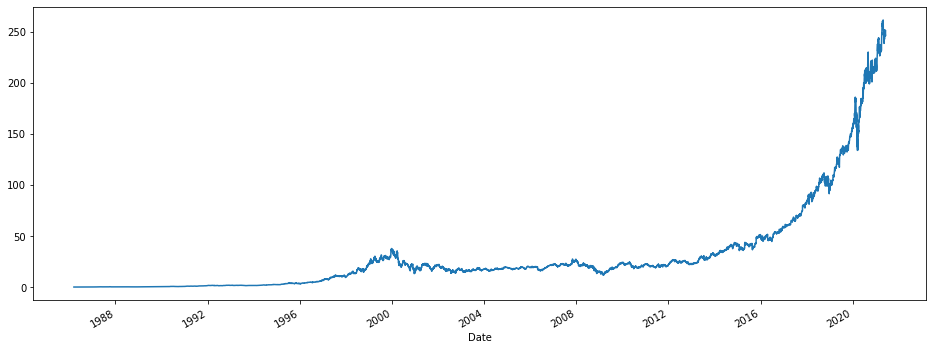

In [79]:
# Plot the time series trend over time
msft_hist['Close'].plot(figsize=(16,6))

In [80]:
# Get actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
1996-12-09,0.00,2.0
1998-02-23,0.00,2.0
1999-03-29,0.00,2.0
2003-02-18,0.00,2.0


In [83]:
# Get next events (earnings, etc.)
msft.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44105500000,44105500000
Revenue Low,40850000000,40850000000
Revenue High,45019500000,45019500000


In [81]:
# Get yearly balance sheet
msft.balancesheet

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Total Liab,1.830070e+11,1.842260e+11,1.761300e+11,1.626010e+11
Total Stockholder Equity,1.183040e+11,1.023300e+11,8.271800e+10,8.771100e+10
Other Current Liab,4.600100e+10,4.586000e+10,3.819500e+10,3.087900e+10
Total Assets,3.013110e+11,2.865560e+11,2.588480e+11,2.503120e+11
Common Stock,8.055200e+10,7.852000e+10,7.122300e+10,6.931500e+10
Other Current Assets,1.151700e+10,1.013300e+10,6.855000e+09,5.183000e+09
Retained Earnings,3.456600e+10,2.415000e+10,1.368200e+10,1.776900e+10
Other Liab,3.449200e+10,3.569900e+10,3.570700e+10,2.298600e+10
Good Will,4.335100e+10,4.202600e+10,3.568300e+10,3.512200e+10


In [82]:
# Get quarterly balance sheet
msft.quarterly_balance_sheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Intangible Assets,8.127000e+09,6.555000e+09,6.923000e+09,7.038000e+09
Total Liab,1.743740e+11,1.739010e+11,1.776090e+11,1.830070e+11
Total Stockholder Equity,1.345050e+11,1.302360e+11,1.233920e+11,1.183040e+11
Other Current Liab,4.006900e+10,3.992600e+10,4.299600e+10,4.600100e+10
Total Assets,3.088790e+11,3.041370e+11,3.010010e+11,3.013110e+11
Common Stock,8.230800e+10,8.189600e+10,8.108900e+10,8.055200e+10
Other Current Assets,1.203400e+10,1.274800e+10,1.357200e+10,1.151700e+10
Retained Earnings,5.073500e+10,4.497300e+10,3.919300e+10,3.456600e+10
Other Liab,3.160100e+10,3.158500e+10,3.317400e+10,3.449200e+10
Good Will,4.969800e+10,4.421900e+10,4.389000e+10,4.335100e+10


In [84]:
# Get yearly financials
msft.financials

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Research Development,19269000000.0,16876000000.0,14726000000.0,13037000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,53036000000.0,43688000000.0,36474000000.0,29901000000.0
Minority Interest,None,None,None,None
Net Income,44281000000.0,39240000000.0,16571000000.0,25489000000.0
Selling General Administrative,24709000000.0,23098000000.0,22223000000.0,19942000000.0
Gross Profit,96937000000.0,82933000000.0,72007000000.0,62310000000.0
Ebit,52959000000.0,42959000000.0,35058000000.0,29331000000.0
Operating Income,52959000000.0,42959000000.0,35058000000.0,29331000000.0
Other Operating Expenses,None,None,None,None


In [85]:
# Get quarterly financials
msft.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,5204000000.0,4899000000.0,4926000000.0,5214000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,17236000000.0,18337000000.0,16124000000.0,13422000000.0
Minority Interest,None,None,None,None
Net Income,15457000000.0,15463000000.0,13893000000.0,11202000000.0
Selling General Administrative,6409000000.0,6086000000.0,5350000000.0,7073000000.0
Gross Profit,28661000000.0,28882000000.0,26152000000.0,25694000000.0
Ebit,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Operating Income,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Other Operating Expenses,None,None,None,None


In [54]:
# Get yearly financials
msft.cashflow

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Investments,6.980000e+09,5.400000e+08,6.557000e+09,-1.251100e+10
Change To Liabilities,5.230000e+09,4.694000e+09,7.070000e+09,3.901000e+09
Total Cashflows From Investing Activities,-1.222300e+10,-1.577300e+10,-6.061000e+09,-4.678100e+10
Net Borrowings,-5.518000e+09,-4.000000e+09,-1.020100e+10,3.145900e+10
Total Cash From Financing Activities,-4.603100e+10,-3.688700e+10,-3.359000e+10,8.408000e+09
Change To Operating Activities,-6.730000e+08,-1.542000e+09,-4.590000e+08,3.490000e+08
Issuance Of Stock,1.343000e+09,1.142000e+09,1.002000e+09,7.720000e+08
Net Income,4.428100e+10,3.924000e+10,1.657100e+10,2.548900e+10
Change In Cash,2.220000e+09,-5.900000e+08,4.283000e+09,1.153000e+09
Repurchase Of Stock,-2.296800e+10,-1.954300e+10,-1.072100e+10,-1.178800e+10


In [55]:
# Get quarterly financials
msft.quarterly_cashflow

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Investments,2.517000e+09,2.593000e+09,2.100000e+09,3.173000e+09
Change To Liabilities,3.600000e+08,-3.194000e+09,-2.749000e+09,1.180200e+10
Total Cashflows From Investing Activities,-9.684000e+09,-1.669000e+09,-5.371000e+09,-4.462000e+09
Net Borrowings,-5.000000e+08,-3.250000e+09,-3.250000e+09,-3.250000e+09
Total Cash From Financing Activities,-1.319200e+10,-1.363400e+10,-1.028900e+10,-1.226200e+10
Change To Operating Activities,1.305000e+09,1.879000e+09,-2.823000e+09,6.430000e+08
Issuance Of Stock,3.960000e+08,3.020000e+08,5.450000e+08,3.400000e+08
Net Income,1.545700e+10,1.546300e+10,1.389300e+10,1.120200e+10
Change In Cash,-7.300000e+08,-2.773000e+09,3.629000e+09,1.866000e+09
Repurchase Of Stock,-6.930000e+09,-6.535000e+09,-6.743000e+09,-5.791000e+09


In [58]:
# Get dividents
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
2005-05-16    0.08
2005-08-15    0.08
2005-11-15    0.08
2006-02-15    0.09
2006-05-15    0.09
2006-08-15    0.09
2006-11-14    0.10
2007-02-13    0.10
2007-05-15    0.10
2007-08-14    0.10
2007-11-13    0.11
2008-02-19    0.11
2008-05-13    0.11
2008-08-19    0.11
2008-11-18    0.13
2009-02-17    0.13
2009-05-19    0.13
2009-08-18    0.13
2009-11-17    0.13
2010-02-16    0.13
2010-05-18    0.13
2010-08-17    0.13
2010-11-16    0.16
2011-02-15    0.16
2011-05-17    0.16
2011-08-16    0.16
2011-11-15    0.20
2012-02-14    0.20
2012-05-15    0.20
2012-08-14    0.20
2012-11-13    0.23
2013-02-19    0.23
2013-05-14    0.23
2013-08-13    0.23
2013-11-19    0.28
2014-02-18    0.28
2014-05-13    0.28
2014-08-19    0.28
2014-11-18    0.31
2015-02-17    0.31
2015-05-19    0.31
2015-08-18    0.31
2015-11-17    0.36
2016-02-16    0.36
2016-05-17    0.36
2016-08-16    0.36
2016-11-15    0.39
2017-02

In [60]:
# Get earningns
msft.earnings

,Revenue,Earnings
Year,,
2017,96571000000,25489000000
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000


In [87]:
# Get history
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-05,248.486221,248.925210,245.253695,245.902191,21901300,0.00,0
2021-05-06,245.882236,249.284384,244.126296,249.154678,26491100,0.00,0
2021-05-07,251.569089,253.714145,250.591351,251.878387,27010100,0.00,0
2021-05-10,250.292051,251.150071,246.550691,246.610550,29299900,0.00,0
2021-05-11,243.986613,246.031893,242.011178,245.662735,33641600,0.00,0
2021-05-12,241.612097,243.817013,237.521552,238.449402,36684400,0.00,0
2021-05-13,241.242946,245.034195,240.863817,242.470108,29624300,0.00,0
2021-05-14,245.014237,248.605934,244.924448,247.578308,23868600,0.00,0
2021-05-17,245.982012,246.021913,242.958994,244.615158,24970200,0.00,0


In [90]:
# Get major holders
msft.major_holders.sort_values(0, ascending=False)

,0,1
2,72.36%,% of Float Held by Institutions
1,72.31%,% of Shares Held by Institutions
3,5320,Number of Institutions Holding Shares
0,0.07%,% of Shares Held by All Insider


In [57]:
# Get instituional holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610849992,2021-03-30,0.0811,144020102613
1,Blackrock Inc.,518649291,2021-03-30,0.0689,122281943339
2,State Street Corporation,292575655,2021-03-30,0.0388,68980562179
3,"FMR, LLC",217585928,2021-03-30,0.0289,51300234244
4,Price (T.Rowe) Associates Inc,178824616,2021-03-30,0.0237,42161479714
5,"Geode Capital Management, LLC",120231394,2021-03-30,0.0160,28346955763
6,Capital World Investors,112150578,2021-03-30,0.0149,26441741775
7,Capital Research Global Investors,99286940,2021-03-30,0.0132,23408881843
8,Capital International Investors,90228967,2021-03-30,0.0120,21273283549
9,Northern Trust Corporation,89762724,2021-03-30,0.0119,21163357437


In [92]:
# Get mutual funds holders
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,212622731,2021-03-30,0.0282,50130061287
1,Vanguard 500 Index Fund,154447541,2021-03-30,0.0205,36414096741
2,SPDR S&P 500 ETF Trust,78233730,2021-03-30,0.0104,18445166522
3,Fidelity 500 Index Fund,69051172,2021-03-30,0.0092,16280194822
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",62071157,2021-03-30,0.0082,14634516685
5,Vanguard Institutional Index Fund-Institutional Index Fund,60265311,2021-03-30,0.0080,14208752374
6,iShares Core S&P 500 ETF,58593717,2021-03-30,0.0078,13814640657
7,Vanguard Growth Index Fund,58592382,2021-03-30,0.0078,13814325904
8,Growth Fund Of America Inc,54525474,2021-03-30,0.0072,12855471004
9,Washington Mutual Investors Fund,32883928,2021-03-30,0.0044,7753043704


In [98]:
# Get ISIN code *experimental
# ISIN = International Securities Identification Number
msft.isin

'US5949181045'

In [101]:
# Get options expirations
msft.options

('2021-06-11',
 '2021-06-18',
 '2021-06-25',
 '2021-07-02',
 '2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [110]:
# Get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')
opt = msft.option_chain()

In [111]:
# Get option calls
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210611C00125000,2021-05-27 18:15:06,125.0,124.95,0.00,0.00,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
1,MSFT210611C00135000,2021-06-02 16:23:03,135.0,112.50,0.00,0.00,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
2,MSFT210611C00140000,2021-06-04 15:24:28,140.0,110.95,0.00,0.00,0.0,0.0,10.0,0,0.000010,True,REGULAR,USD
3,MSFT210611C00145000,2021-06-02 13:50:31,145.0,103.60,0.00,0.00,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
4,MSFT210611C00150000,2021-06-01 17:44:38,150.0,97.89,0.00,0.00,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
5,MSFT210611C00155000,2021-06-02 15:22:10,155.0,93.50,0.00,0.00,0.0,0.0,9.0,0,0.000010,True,REGULAR,USD
6,MSFT210611C00160000,2021-06-02 16:00:57,160.0,88.05,0.00,0.00,0.0,0.0,6.0,0,0.000010,True,REGULAR,USD
7,MSFT210611C00165000,2021-06-02 16:27:11,165.0,82.30,0.00,0.00,0.0,0.0,32.0,0,0.000010,True,REGULAR,USD
8,MSFT210611C00170000,2021-06-04 15:25:09,170.0,80.95,0.00,0.00,0.0,0.0,20.0,0,0.000010,True,REGULAR,USD
9,MSFT210611C00175000,2021-06-02 14:11:48,175.0,73.25,0.00,0.00,0.0,0.0,31.0,0,0.000010,True,REGULAR,USD


In [112]:
# Get option puts
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210611P00130000,2021-05-17 04:01:04,130.0,0.05,0.0,0.0,0.0,0.0,NaN,0,0.500005,False,REGULAR,USD
1,MSFT210611P00135000,2021-05-17 04:01:04,135.0,0.05,0.0,0.0,0.0,0.0,NaN,0,0.500005,False,REGULAR,USD
2,MSFT210611P00140000,2021-06-04 13:30:30,140.0,0.02,0.0,0.0,0.0,0.0,1.0,0,0.500005,False,REGULAR,USD
3,MSFT210611P00145000,2021-06-02 13:30:12,145.0,0.01,0.0,0.0,0.0,0.0,1.0,0,0.500005,False,REGULAR,USD
4,MSFT210611P00150000,2021-05-20 15:51:58,150.0,0.06,0.0,0.0,0.0,0.0,12.0,0,0.500005,False,REGULAR,USD
5,MSFT210611P00155000,2021-05-20 15:48:29,155.0,0.07,0.0,0.0,0.0,0.0,4.0,0,0.500005,False,REGULAR,USD
6,MSFT210611P00160000,2021-05-20 16:01:40,160.0,0.08,0.0,0.0,0.0,0.0,29.0,0,0.500005,False,REGULAR,USD
7,MSFT210611P00165000,2021-05-19 13:30:12,165.0,0.07,0.0,0.0,0.0,0.0,2.0,0,0.500005,False,REGULAR,USD
8,MSFT210611P00170000,2021-06-04 19:51:45,170.0,0.01,0.0,0.0,0.0,0.0,100.0,0,0.500005,False,REGULAR,USD
9,MSFT210611P00175000,2021-06-04 19:51:51,175.0,0.01,0.0,0.0,0.0,0.0,50.0,0,0.500005,False,REGULAR,USD


In [95]:
# Get sustainability scores
msft.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [96]:
msft.get_recommendations()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
2012-04-20 06:44:00,Goldman Sachs,Neutral,,main
2012-04-20 07:05:00,Bank oferica,Buy,,main
2012-04-20 11:51:00,UBS,Buy,,main
2012-04-20 12:28:00,McAdams Wright Ragen,Buy,,main


### Multiple Tickers

In [122]:
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

AttributeError: 'dict' object has no attribute 'MSFT'

### Download Data

In [ ]:
def download_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    stock.insert(0, "Ticker", ticker.upper())
    stock.to_csv('{}_{}.csv'.format(ticker, datetime.today().date()))
    return stock.head()

In [ ]:
download_data('aapl', "2021-01-01", "2021-05-08")

In [ ]:
apple = yf.download("AAPL", start='2021-01-01', end="2021-05-08")

In [ ]:
apple

In [130]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [131]:
data

MSFT                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2021-01-04  221.507173  221.975014  213.822655  216.689423  37130100   
2021-01-05  216.261380  217.515598  214.708553  216.898438  23823000   
2021-01-06  211.194780  215.494931  210.965841  211.274414  35930700   
2021-01-07  213.056186  218.331828  212.727716  217.286652  27694500   
2021-01-08  217.674868  219.566144  216.032458  218.610550  22956200   
2021-01-11  217.465832  217.903813  215.733825  216.490341  23031300   
2021-01-12  215.504884  216.102132  212.339508  213.942093  23249300   
2021-01-13  213.036298  215.763695  212.946700  215.345627  20087100   
2021-01-14  214.917594  216.460473  211.762167  212.040878  29480800   
2021-01-15  212.538588  213.524028  211.055432  211.672577  31746500   
2021-01-19  212.767537  215.982686  211.652690  215.445175  30480900   
2021-01-20  216.699373  224.752185  216.291254  223.308853  37777300   
2021-01-21  223.667196  225.259848  221.397677  223.935959  30709400   
2021-01-22  226.036264  229.012527  224.762149  224.911453  30172700   
2021-01-25  228.066872  228.723842  223.189400  228.474991  33152100   
2021-01-26  230.794290  233.103618  229.022473  231.262131  49169600   
2021-01-27  236.906078  239.334866  229.082205  231.829514  69870600   
2021-01-28  234.527055  241.524741  234.009441  237.831787  49111200   
2021-01-29  234.905320  236.925988  230.286648  230.893845  42503100   
2021-02-01  233.979578  241.385384  231.361662  238.548477  33314200   
2021-02-02  240.190900  241.196252  237.592896  238.409119  25916300   
2021-02-03  238.468860  243.963477  238.160272  241.883087  27158100   
2021-02-04  241.544650  242.121986  239.265167  240.897629  25296100   
2021-02-05  241.116622  242.161799  239.314944  241.086761  18054800   
2021-02-08  242.032397  242.559960  239.703156  241.355530  22211900   
2021-02-09  240.758260  243.634976  240.270522  242.649536  23565000   
2021-02-10  243.873891  244.789661  239.782782  241.703918  22186700   
2021-02-11  243.654902  244.023196  241.036985  243.366241  15751100   
2021-02-12  242.808797  244.172510  241.614315  243.863937  16561100   
2021-02-16  243.903753  244.998703  241.803451  242.579865  26728500   
2021-02-17  240.764066  243.747168  240.384936  243.637421  21653500   
2021-02-18  241.242942  243.368025  240.305105  243.228348  16925600   
2021-02-19  243.188450  243.298197  239.626667  240.414856  25262600   
2021-02-22  236.873042  237.381861  231.864602  233.969742  36446900   
2021-02-23  229.799376  234.289009  228.203056  232.732605  30228700   
2021-02-24  229.480109  234.658155  228.472442  234.009659  26339700   
2021-02-25  231.545341  234.049553  227.355020  228.462463  39542200   
2021-02-26  230.996602  234.827752  229.011181  231.844650  37819200   
2021-03-01  235.356537  236.922928  232.612873  236.394150  25324000   
2021-03-02  236.463973  236.753313  232.912177  233.331207  22812500   
2021-03-03  231.625160  233.041887  226.736439  227.035751  34029500   
2021-03-04  226.217644  231.954397  223.743346  226.207657  44727800   
2021-03-05  228.991242  232.732603  225.938294  231.066452  41872800   
2021-03-08  230.836977  232.832369  226.606754  226.866150  35267400   
2021-03-09  232.343504  234.837745  231.136285  233.241425  33080500   
2021-03-10  236.454002  236.454002  231.505423  231.884552  29746800   
2021-03-11  234.418711  238.619003  233.770199  236.583710  29907600   
2021-03-12  233.470882  235.276725  232.692680  235.206879  22653700   
2021-03-15  234.418707  234.648172  231.275954  234.269043  26034900   
2021-03-16  235.735655  239.506946  235.396442  237.162369  28092200   
2021-03-17  235.605963  238.000443  232.692691  236.493912  29562100   
2021-03-18  232.024234  233.650484  229.799376  230.188477  34833000   
2021-03-19  230.487791  231.934447  228.821640  229.819336

# Parking Lot

In [8]:

# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute
data = yf.download(tickers='TSLA', period='30d', interval='1d')

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='TESLA live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-26,741.000000,749.299988,732.609985,738.200012,738.200012,31038500
2021-04-27,717.960022,724.000000,703.349976,704.739990,704.739990,29437000
2021-04-28,696.409973,708.500000,693.599976,694.400024,694.400024,22271000
2021-04-29,699.510010,702.250000,668.500000,677.000000,677.000000,28845400
2021-04-30,667.590027,715.469971,666.140015,709.440002,709.440002,40758700
2021-05-03,703.799988,706.000000,680.500000,684.900024,684.900024,27043100
2021-05-04,678.940002,683.450012,657.700012,673.599976,673.599976,29739300
2021-05-05,681.059998,685.299988,667.340027,670.940002,670.940002,21901900
2021-05-06,680.760010,681.020020,650.000000,663.539978,663.539978,27784600


In [7]:
fig.show()